<a href="https://colab.research.google.com/github/angui100/AI-TensorFlow-Study-Group/blob/master/TransferLearning_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- Transfer learning is a key skill to acquire as a data scientist since it can dramatically reduce the computational time required if the network is being trained from scratch (i.e.: starting from purely random weights). 
- In this project, we will apply Transfer learning to repurpose trained weights from ResNet 50, which is a famous deep network, to perform classification tasks on a new datasets. 
- A pre-trained ResNet50 model that has been trained on ImageNet will be repurposed and used to classify new images of cats and dogs
- The new model will consist of two part: 
    - (1) "base" pre-trained network  
    - (2) "new dense network classifier"
- The feature maps that has been previously trained will be augmented with a new classifier (new Dense layers) so we do not have to train the model from scratch 
- Fine tuning can be performed by unfreezing the top layers (base) and slowly training the entire network so an improved performance can be achieved. 
- ResNet50 is a deep residual learning architecture that is widely used for image classification
- The ResNet50 is trained using ImageNet which is an open source repository of images
- Citations: Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Berg and Li Fei-Fei. (* = equal contribution) ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575, 2014.
- Paper: https://arxiv.org/abs/1409.0575
- Data Source: https://www.kaggle.com/tongpython/cat-and-dog

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
model = tf.keras.applications.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 3s 0us/step


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tf.__version__

In [0]:
image_bike = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/projects/transferlearning/images/bike_1.jpg', target_size=(224, 224))

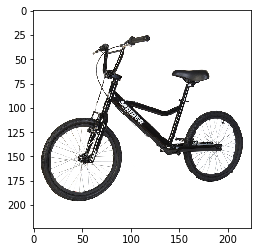

In [6]:
plt.imshow(image_bike)

In [0]:
image_elephant = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/projects/transferlearning/images/african_elephant_1.jpg', target_size=(224, 224))

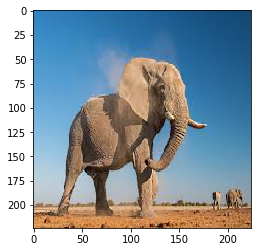

In [8]:
plt.imshow(image_elephant)

In [9]:
np.shape(image_elephant)

(224, 224, 3)

In [10]:
np.shape(image_bike)

(224, 224, 3)

In [0]:
image_elephant = np.expand_dims(image_elephant, axis = 0)

In [12]:
np.shape(image_elephant)

(1, 224, 224, 3)

In [0]:
image_elephant.max()

In [0]:
image_elephant.min()

In [0]:
image_elephant = tf.keras.applications.resnet50.preprocess_input(image_elephant)

In [14]:
image_elephant.max()

151.061

In [0]:
image_elephant.min()

In [15]:
image_elephant.shape

(1, 224, 224, 3)

In [0]:
predictions = model.predict(image_elephant)

In [17]:
print('predictions:', tf.keras.applications.resnet50.decode_predictions(predictions, top = 5)[0])

40960/35363 [==================================] - 0s 0us/step
predictions: [('n02504458', 'African_elephant', 0.90421385), ('n01871265', 'tusker', 0.0704964), ('n02504013', 'Indian_elephant', 0.024511639), ('n02437312', 'Arabian_camel', 0.0007446011), ('n01704323', 'triceratops', 1.00236875e-05)]


#### Step 4. Apply transfer learning and retrain the model

In [18]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False )
#base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = True )

94773248/94765736 [==============================] - 3s 0us/step


In [19]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

In [0]:
x = base_model.output

In [21]:
x

<tf.Tensor 'conv5_block3_out_1/Identity:0' shape=(None, None, None, 2048) dtype=float32>

In [0]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)

In [0]:
model_new = tf.keras.models.Model(inputs = base_model.input, outputs = preds )

In [25]:
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
for layer in model_new.layers[:175]:
  layer.trainable = False

for layer in model_new.layers[175:]:
  layer.trainable = True

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.resnet50.preprocess_input
)

In [28]:
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
# Download dataset of images

# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-02-27 16:39:59--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 2.19.105.18, 2a02:26f0:d6:4b4::e59, 2a02:26f0:d6:48f::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|2.19.105.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  11.8MB/s    in 80s     

2020-02-27 16:41:19 (9.89 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [0]:
import os
# Prepare the data storages for training set and validation set

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [30]:
# Method works on spliting data into train set and validation set
# Training set is located in  
# /tmp/cats-v-dogs/training
# Validation set is located in
# /tmp/cats-v-dogs/testing
# This datset files directory structure helps us to generate the class labels, CATS and DOGS
# 90% image files are put into training set
# 10% image files are put into validation set

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

# Split rate
# 90% for training set, 10% for validation set
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [31]:
#Feed the model with datasets
#Using ImageDataGenerator class to convert data sets to tensor data type

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
#train_datagen = ImageDataGenerator(rescale=1.0/255.)
#train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    color_mode = 'rgb',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    shuffle = True)


#VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
#validation_datagen = ImageDataGenerator(rescale=1.0/255.)
#validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
#                                                              batch_size=100,
#                                                              class_mode='binary',
#                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.


In [0]:
#train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input)

#train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/train/', 
#                                                   target_size = (224, 224),
#                                                   color_mode = 'rgb',
#                                                   batch_size = 32,
#                                                   class_mode = 'categorical',
#                                                   shuffle = True)

In [0]:
model_new.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history = model_new.fit_generator( generator = train_generator, steps_per_epoch = train_generator.n // train_generator.batch_size, epochs = 3)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 224 steps
Epoch 1/3
 30/224 [===>..........................] - ETA: 1:53 - loss: 0.5614 - accuracy: 0.8487

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

224/224 [==============================] - 109s 485ms/step - loss: 0.1375 - accuracy: 0.9566
Epoch 2/3
224/224 [==============================] - 103s 459ms/step - loss: 0.0471 - accuracy: 0.9817
Epoch 3/3
224/224 [==============================] - 103s 458ms/step - loss: 0.0421 - accuracy: 0.9840


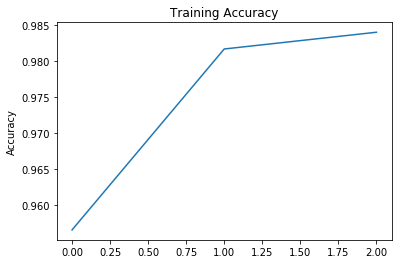

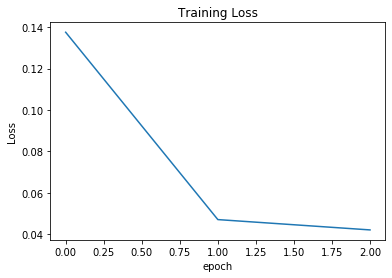

In [34]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
cat_Image= tf.keras.preprocessing.image.load_img(r'/tmp/cats-v-dogs/testing/cats/10040.jpg', target_size = (224, 224))

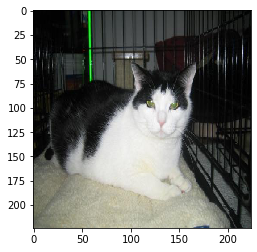

In [37]:
plt.imshow(cat_Image)

In [0]:
dog_Image= tf.keras.preprocessing.image.load_img(r'/tmp/cats-v-dogs/testing/dogs/10060.jpg', target_size = (224, 224))

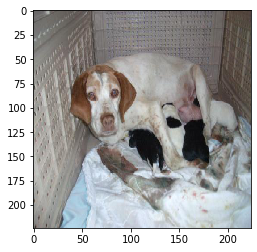

In [39]:
plt.imshow(dog_Image)

In [0]:
cat_Image_Array = tf.keras.preprocessing.image.img_to_array( cat_Image )

In [41]:
processed_image = tf.keras.applications.resnet50.preprocess_input( cat_Image_Array )
processed_image = np.expand_dims(processed_image, axis = 0)
#np.shape( processed_image )
predictions = model_new.predict( processed_image )
print('Predictions:', predictions)

Predictions: [[1.0000000e+00 4.9917105e-11]]


In [0]:
dog_Image_Array = tf.keras.preprocessing.image.img_to_array( dog_Image )

In [43]:
processed_image = tf.keras.applications.resnet50.preprocess_input( dog_Image_Array )
processed_image = np.expand_dims(processed_image, axis = 0)
#np.shape( processed_image )
predictions = model_new.predict( processed_image )
print('Predictions:', predictions)

Predictions: [[1.3857984e-08 1.0000000e+00]]


In [0]:
np.shape( cat_Image )

(224, 224, 3)

In [0]:
def call_prediction( myimage ):
  processed_image = tf.keras.applications.resnet50.preprocess_input( myimage )
  processed_image = np.expand_dims(processed_image, axis = 0)
  predictions = model_new.predict( processed_image )
  print('Predictions:', predictions)

In [0]:
call_prediction( cat_Image )